In [1]:
from mealpy import SMA, GA, PSO
from knn_problem_for_meta_heuristic import KnnProblemForMetaHeuristic
from meta_heuristic_visualize import MetaHeuristicVisualize
from knn_meta.knn_problem_bounds import problem_bounds, termination
import seaborn as sns

In [27]:
data = sns.load_dataset("iris")
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
target_key = {
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2
}

attributes = data.drop("species", axis=1)
target = data["species"].map(target_key)

In [7]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [19]:
problem = KnnProblemForMetaHeuristic(attributes, target, problem_bounds)
model = PSO.OriginalPSO(epoch=80)

In [20]:
model.solve(problem, termination=termination)

2025/07/01 07:48:44 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: OriginalPSO(epoch=80, pop_size=100, c1=2.05, c2=2.05, w=0.4)
2025/07/01 07:48:46 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 1.30705 seconds
2025/07/01 07:48:48 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 1.34177 seconds
2025/07/01 07:48:49 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 1.51524 seconds
2025/07/01 07:48:51 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 4, Current best: 1.0, Global best: 1.0, Runtime: 1.44992 seconds
2025/07/01 07:48:52 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 1.86912 seconds
2025/07/01 07:48:54 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 6, Current best: 1.0

id: 293, target: Objectives: [1.], Fitness: 1.0, solution: [ 0.24076539 32.72675393  0.70586135  4.60228927  0.          0.
  1.        ]

Best accuracy: 1.0
Best parameters: 
{'test_size': 0.2407653938445045, 'n_neighbors': 33, 'leaf_size': 1, 'p': 5, 'weights': 'distance', 'algorithm': 'auto', 'metric': 'manhattan'}


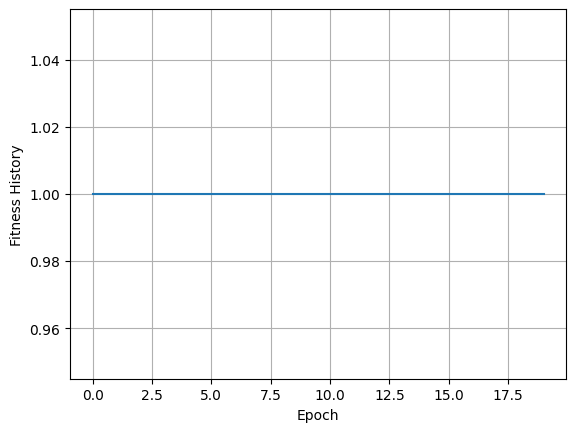

In [21]:
MetaHeuristicVisualize.plot(model)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Normal Yöntem ile test
x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size=0.1621, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = KNeighborsClassifier(
    n_neighbors=3, 
    weights='distance', 
    algorithm='auto', 
    leaf_size=3, 
    p=5, 
    metric='manhattan'
)

model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0